In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Import the specific scripts from the folder
from spikes_proxy_funcs import datasets, processing

In [2]:
data = datasets.load_selected_data(num_datasets='all', num_neurons_per_dataset='all')

In [3]:
new_rate = 100 # Hz
upsampled_results = []

In [4]:
for ds_name, recordings in data.items():
    for i, rec in enumerate(recordings):
        times = rec['t']
        dff = rec['dff']
        spikes = rec['spikes']
        
        # Upsample using our new helper function
        u_sig, u_spk = processing.upsample(times, dff, spikes, new_rate=new_rate, do_plot=False)
        
        upsampled_results.append({
            'dataset': ds_name,
            'neuron_idx': i,
            'signal': u_sig,
            'spikes': u_spk
        })

In [7]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

summary_list = []

print("Generating Dataset Summary Table...")

for res in upsampled_results:
    ds_name = res['dataset']
    idx = res['neuron_idx']
    
    # --- Retrieve Signals ---
    u_sig = res['signal']
    u_spk = res['spikes']
    
    # --- Retrieve Original Metadata ---
    # Access original 'data' dict to get the original frame rate
    # (Safe lookup in case 'data' variable isn't perfectly synced)
    if 'data' in globals() and ds_name in data and idx < len(data[ds_name]):
        orig_fps = data[ds_name][idx].get('frame_rate', np.nan)
    else:
        orig_fps = np.nan
    
    # --- Calculate Features ---
    # 1. Duration (seconds)
    duration = len(u_sig) / new_rate
    
    # 2. Number of Spikes
    n_spikes = np.sum(u_spk > 0.5)
    
    # 3. Firing Rate (Hz)
    firing_rate = n_spikes / duration if duration > 0 else 0
    
    # 4. Signal Stats
    sig_mean = np.mean(u_sig)
    sig_std = np.std(u_sig)
    
    # --- Append to List ---
    summary_list.append({
        'Dataset': ds_name,
        'Neuron_Idx': idx,
        'Original_FPS': orig_fps,
        'Upsampled_FPS': new_rate,
        'Duration_s': round(duration, 2),
        'Num_Spikes': int(n_spikes),
        'Firing_Rate_Hz': round(firing_rate, 2),
        'Signal_Mean': round(sig_mean, 4),
        'Signal_Std': round(sig_std, 4)
    })

# Create DataFrame
df_summary = pd.DataFrame(summary_list)

# 1. Temporarily show ALL rows (disable truncation) otherwise to_html truncates
pd.set_option('display.max_rows', None)

print(f"Total Neurons: {len(df_summary)}")

# 2. Display with scrollbar (height: 300px gives approx. 10 rows visible)
display(HTML("<div style='height: 300px; overflow: auto; width: 100%'>" + 
             df_summary.to_html() + 
             "</div>"))

# 3. Reset option (optional, so other cells behave normally)
pd.reset_option('display.max_rows')

# Optional: Averages Table
print("\n--- Averages by Dataset ---")
display(df_summary.groupby('Dataset')[['Original_FPS', 'Firing_Rate_Hz', 'Duration_s']].mean().round(2))

Generating Dataset Summary Table...
Total Neurons: 1157


,Dataset,Neuron_Idx,Original_FPS,Upsampled_FPS,Duration_s,Num_Spikes,Firing_Rate_Hz,Signal_Mean,Signal_Std
0,DS01-OGB1-m-V1,0,12.175000,100,470.30,359,0.76,0.0576,0.0527
1,DS01-OGB1-m-V1,1,12.022000,100,96.81,44,0.45,0.0630,0.0577
2,DS01-OGB1-m-V1,2,11.467000,100,370.79,293,0.79,0.0468,0.0430
3,DS01-OGB1-m-V1,3,10.926000,100,212.51,587,2.76,0.0474,0.0386
4,DS01-OGB1-m-V1,4,12.175000,100,257.08,326,1.27,0.0651,0.0559
5,DS01-OGB1-m-V1,5,11.952000,100,336.84,362,1.07,0.0488,0.0519
6,DS01-OGB1-m-V1,6,9.743000,100,543.97,1381,2.54,0.0718,0.0658
7,DS01-OGB1-m-V1,7,11.607000,100,320.49,218,0.68,0.0515,0.0475
8,DS01-OGB1-m-V1,8,11.607000,100,274.13,527,1.92,0.0681,0.0810
9,DS01-OGB1-m-V1,9,10.667000,100,630.35,251,0.40,0.0420,0.0365



--- Averages by Dataset ---


,Original_FPS,Firing_Rate_Hz,Duration_s
Dataset,,,
DS01-OGB1-m-V1,11.45,1.80,415.55
DS02-OGB1-2-m-V1,15.46,0.21,148.46
DS03-Cal520-m-S1,500.00,1.06,7.92
DS04-OGB1-zf-pDp,7.71,0.54,108.81
DS05-Cal520-zf-pDp,7.81,0.78,117.84
DS06-GCaMP6f-zf-aDp,30.05,2.11,119.83
DS07-GCaMP6f-zf-dD,30.05,1.38,119.81
DS08-GCaMP6f-zf-OB,30.05,3.95,118.09
DS09-GCaMP6f-m-V1,60.06,0.56,234.80


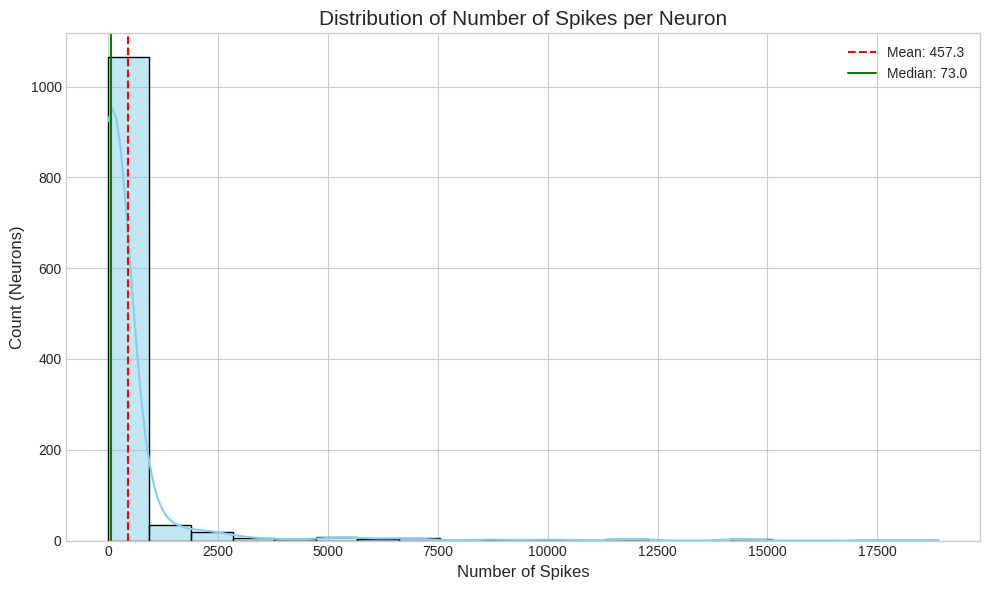

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for nicer plots (optional)
# Using seaborn-v0_8 style to avoid warnings if seaborn is updated
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    try:
        plt.style.use('seaborn-whitegrid')
    except:
        pass # Fallback to default

plt.figure(figsize=(10, 6))

# Plot Histogram with KDE (Kernel Density Estimate)
sns.histplot(df_summary['Num_Spikes'], kde=True, bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Number of Spikes per Neuron', fontsize=15)
plt.xlabel('Number of Spikes', fontsize=12)
plt.ylabel('Count (Neurons)', fontsize=12)

# Verify if we have varied data
plt.axvline(df_summary['Num_Spikes'].mean(), color='red', linestyle='--', label=f"Mean: {df_summary['Num_Spikes'].mean():.1f}")
plt.axvline(df_summary['Num_Spikes'].median(), color='green', linestyle='-', label=f"Median: {df_summary['Num_Spikes'].median():.1f}")

plt.legend()
plt.tight_layout()
plt.show()

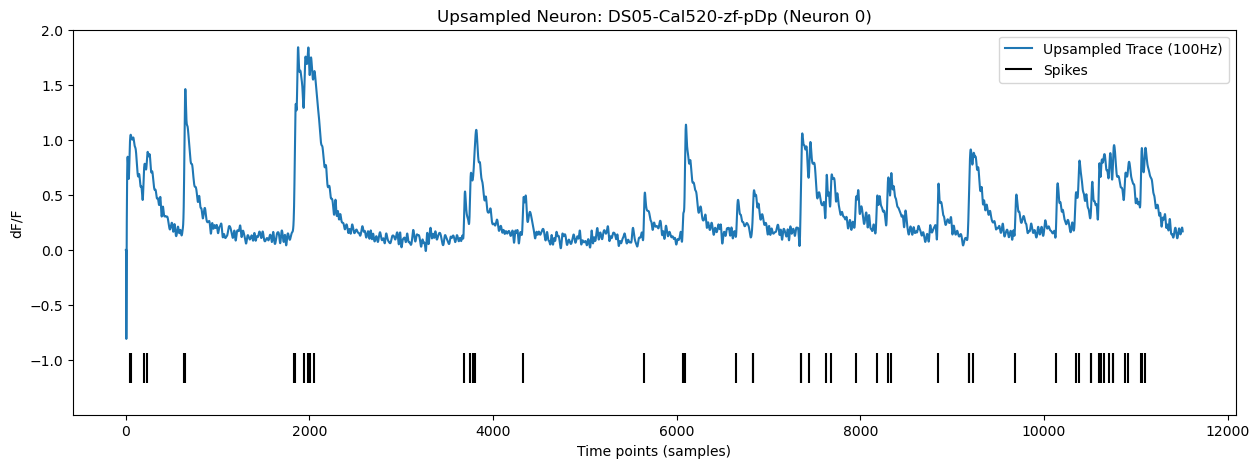

In [5]:
example = upsampled_results[20]
u_sig = example['signal']
u_spk = example['spikes']

plt.figure(figsize=(15, 5))
plt.plot(u_sig, label=f'Upsampled Trace ({new_rate}Hz)')
    
# Calculate global range to position spikes nicely below the signal
mx = np.max(u_sig)
mn = np.min(u_sig)
rng = mx - mn
    
# Plot spikes using eventplot
plt.eventplot(u_spk, lineoffsets=mn - rng*0.1, linelengths=rng*0.1, color='k', label='Spikes')
    
plt.title(f"Upsampled Neuron: {example['dataset']} (Neuron {example['neuron_idx']})")
plt.xlabel("Time points (samples)")
plt.ylabel("dF/F")
plt.legend()
plt.show()

Estimating Tau for all upsampled neurons (Modular Approach)...

--- Tau Estimation Summary ---
                            Dataset_Name  Neuron_Idx  Tau_Cut  Tau_Robust  \
0                         DS01-OGB1-m-V1           0      NaN      155.05   
1                         DS01-OGB1-m-V1           1   453.45     1894.13   
2                         DS01-OGB1-m-V1           2      NaN       93.47   
3                         DS01-OGB1-m-V1           3      NaN         NaN   
4                         DS01-OGB1-m-V1           4   471.01         NaN   
5                       DS02-OGB1-2-m-V1           0    67.82         NaN   
6                       DS02-OGB1-2-m-V1           1      NaN         NaN   
7                       DS02-OGB1-2-m-V1           2   249.52      970.60   
8                       DS02-OGB1-2-m-V1           3      NaN      106.32   
9                       DS02-OGB1-2-m-V1           4   111.62         NaN   
10                      DS03-Cal520-m-S1           0      

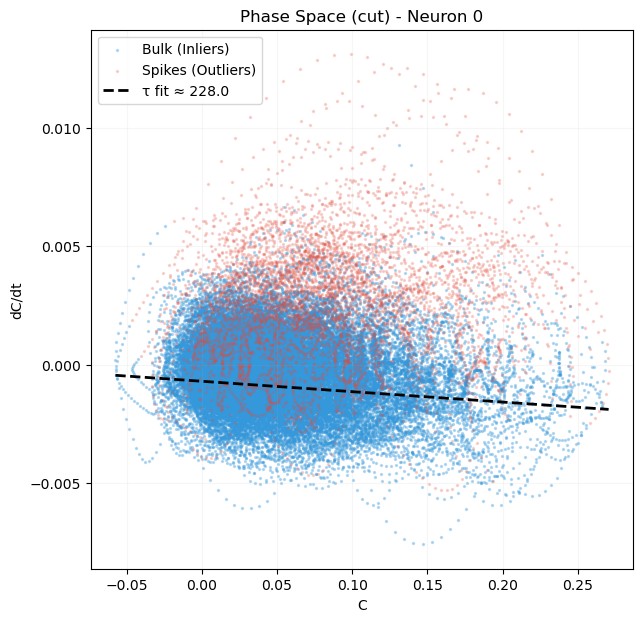

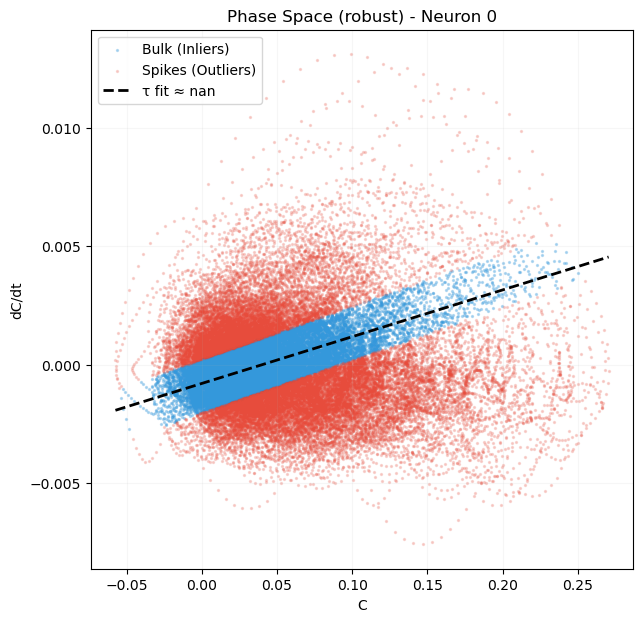

In [6]:
import pandas as pd
# Importing with alias 'ra'
from spikes_proxy_funcs import rate_analysis as ra

# Container for our comparison findings
tau_summary = []

print("Estimating Tau for all upsampled neurons (Modular Approach)...")

for i, res in enumerate(upsampled_results):
    # Prepare data: estimate_tau expects shape (n_neurons, n_time)
    sig_2d = res['signal'].reshape(1, -1)
    spk_2d = res['spikes'].reshape(1, -1)
    
    # 1. Estimate Tau using 'cut' method
    # Access function via the alias 'ra'
    taus_cut = ra.estimate_tau(sig_2d, true_spikes=spk_2d, method='cut', plot=False)
    val_cut = taus_cut[0]
    
    # 2. Estimate Tau using 'robust' method
    taus_robust = ra.estimate_tau(sig_2d, method='robust', plot=False)
    val_robust = taus_robust[0]
    
    # Store in the result dictionary
    res['tau_cut'] = val_cut
    res['tau_robust'] = val_robust
    
    tau_summary.append({
        'Dataset_Name': res['dataset'],
        'Neuron_Idx': res['neuron_idx'],
        'Tau_Cut': val_cut,
        'Tau_Robust': val_robust,
        'Diff': val_robust - val_cut
    })

# Display comparison table
df_tau = pd.DataFrame(tau_summary)
print("\n--- Tau Estimation Summary ---")
print(df_tau.round(2))

# Optional: Visualize one example
if len(tau_summary) > 0:
    print(f"\nExample Phase Space Plots for Neuron 0:")
    ex_sig = upsampled_results[0]['signal'].reshape(1, -1)
    ex_spk = upsampled_results[0]['spikes'].reshape(1, -1)
    # Use 'ra' alias for plotting calls as well
    ra.estimate_tau(ex_sig, true_spikes=ex_spk, method='cut', plot=True, neuron_idx=0)
    ra.estimate_tau(ex_sig, method='robust', plot=True, neuron_idx=0)

Estimating Tau and CV2 for all upsampled neurons...

--- Analysis Summary ---
                                 Dataset  Neuron  CV2_True   Tau_Cut  \
0                         DS01-OGB1-m-V1       0     0.000       NaN   
1                         DS01-OGB1-m-V1       1     0.000   188.105   
2                         DS01-OGB1-m-V1       2     0.000   127.413   
3                         DS01-OGB1-m-V1       3     0.001       NaN   
4                         DS01-OGB1-m-V1       4     0.000       NaN   
5                       DS02-OGB1-2-m-V1       0     0.000       NaN   
6                       DS02-OGB1-2-m-V1       1     0.000       NaN   
7                       DS02-OGB1-2-m-V1       2     0.000   300.449   
8                       DS02-OGB1-2-m-V1       3     0.000   590.375   
9                       DS02-OGB1-2-m-V1       4     0.000    91.441   
10                      DS03-Cal520-m-S1       0     0.000       NaN   
11                      DS03-Cal520-m-S1       1     0.000

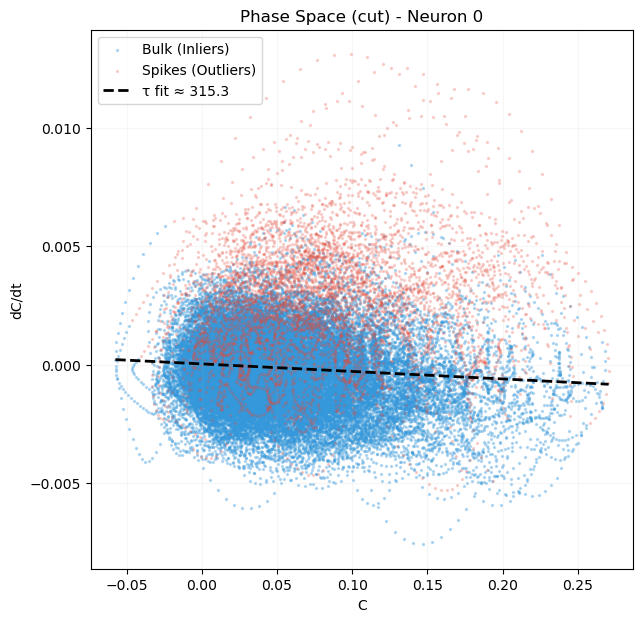

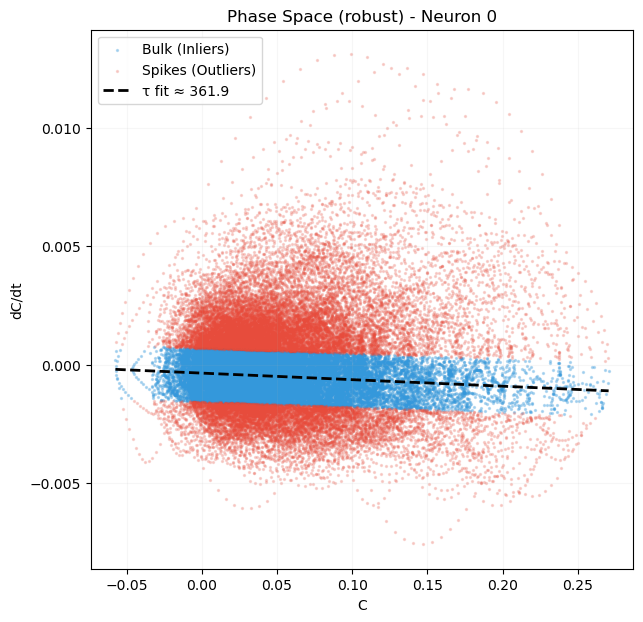

In [7]:
import pandas as pd
from spikes_proxy_funcs import rate_analysis as ra

# Container for our comparison findings
tau_summary = []

print("Estimating Tau and CV2 for all upsampled neurons...")

for i, res in enumerate(upsampled_results):
    # Prepare data (1, n_time)
    sig_2d = res['signal'].reshape(1, -1)
    spk_2d = res['spikes'].reshape(1, -1)
    
    # --- 1. Estimate Tau ---
    taus_cut = ra.estimate_tau(sig_2d, true_spikes=spk_2d, method='cut', plot=False)
    val_cut = taus_cut[0]
    
    taus_robust = ra.estimate_tau(sig_2d, method='robust', plot=False)
    val_robust = taus_robust[0]
    
    # --- 2. Calculate CV2 (Truth) ---
    # calculate_cv2 expects (n_neurons, n_time)
    cv2_val = ra.calculate_cv2(spk_2d)[0]
    
    # Store in the result dictionary
    res['tau_cut'] = val_cut
    res['tau_robust'] = val_robust
    res['cv2_true'] = cv2_val
    
    tau_summary.append({
        'Dataset': res['dataset'],
        'Neuron': res['neuron_idx'],
        'CV2_True': cv2_val,
        'Tau_Cut': val_cut,
        'Tau_Robust': val_robust,
        'Tau_Diff': val_robust - val_cut
    })

# Display comparison table
df_tau = pd.DataFrame(tau_summary)
print("\n--- Analysis Summary ---")
print(df_tau.round(3))  # Rounding to 3 decimals for CV2 visibility

# --- Visualization Section ---
if len(tau_summary) > 0:
    example_idx = 0  # Change this to plot a different neuron
    
    target = upsampled_results[example_idx]
    ex_sig = target['signal'].reshape(1, -1)
    ex_spk = target['spikes'].reshape(1, -1)
    
    print(f"\nExample Phase Space Plots for: {target['dataset']} (Neuron {target['neuron_idx']}) | CV2={target['cv2_true']:.2f}")
    
    ra.estimate_tau(ex_sig, true_spikes=ex_spk, method='cut', plot=True, neuron_idx=0)
    ra.estimate_tau(ex_sig, method='robust', plot=True, neuron_idx=0)